## Image Classifier


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

plt.show()
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from optimizer import *

In [ ]:
np.random.seed(0)

wts = np.arange(-3, 3, dtype=np.float64)
d_wts = np.random.randn(len(wts))

optimizer = SGD()
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD: Wts after 1 iter {new_wts_1}')
print(f'SGD: Wts after 2 iter {new_wts_2}')

SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]


Output should be:

    SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
    SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]

In [ ]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = SGD_Momentum(lr=0.1, m=0.6)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD M: Wts after 1 iter\n{new_wts_1}')
print(f'SGD M: Wts after 2 iter\n{new_wts_2}')

SGD M: Wts after 1 iter
[[ 1.6879486  0.3879897  0.9343517  2.2075258]
 [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
 [ 0.1520801  0.3452366  0.0576     1.52849  ]]
SGD M: Wts after 2 iter
[[ 1.5661825  0.3685217  0.8633335  2.1541379]
 [ 1.4790974 -0.9239367  0.8686908  0.0707077]
 [ 0.5605585  0.2406577 -0.0807098  1.6472364]]


Output should be:

    SGD M: Wts after 1 iter
    [[ 1.6879486  0.3879897  0.9343517  2.2075258]
     [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
     [ 0.1520801  0.3452366  0.0576     1.52849  ]]
    SGD M: Wts after 2 iter
    [[ 1.5661825  0.3685217  0.8633335  2.1541379]
     [ 1.4790974 -0.9239367  0.8686908  0.0707077]
     [ 0.5605585  0.2406577 -0.0807098  1.6472364]]

In [ ]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = Adam(lr=0.1)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print(f'Adam: Wts after 1 iter\n{new_wts_1}')
print(f'Adam: Wts after 2 iter\n{new_wts_2}')
print(f'Adam: Wts after 3 iter\n{new_wts_3}')

Adam: Wts after 1 iter
[[ 1.6640523  0.3001572  0.878738   2.1408932]
 [ 1.767558  -0.8772779  0.8500884 -0.0513572]
 [-0.0032189  0.3105985  0.0440436  1.5542735]]
Adam: Wts after 2 iter
[[ 1.5640523  0.2001572  0.778738   2.0408932]
 [ 1.667558  -0.7772779  0.7500884  0.0486428]
 [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
Adam: Wts after 3 iter
[[ 1.4640523  0.1001572  0.678738   1.9408932]
 [ 1.567558  -0.6772779  0.6500884  0.1486428]
 [ 0.1967811  0.1105985 -0.1559564  1.7542735]]


Output should be:

    Adam: Wts after 1 iter
    [[ 1.6640523  0.3001572  0.878738   2.1408932]
     [ 1.767558  -0.8772779  0.8500884 -0.0513572]
     [-0.0032189  0.3105985  0.0440436  1.5542735]]
    Adam: Wts after 2 iter
    [[ 1.5640523  0.2001572  0.778738   2.0408932]
     [ 1.667558  -0.7772779  0.7500884  0.0486428]
     [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
    Adam: Wts after 3 iter
    [[ 1.4640523  0.1001572  0.678738   1.9408932]
     [ 1.567558  -0.6772779  0.6500884  0.1486428]
     [ 0.1967811  0.1105985 -0.1559564  1.7542735]]  

## Overfitting a convolutional neural network

Usually we try to prevent overfitting, but we can use it as a valuable debugging tool to test out a complex backprop-based neural network. Assuming everything is working, it is almost always the case that we should be able to overfit a tiny dataset with a huge model with tons of parameters (i.e. our CNN). We will use this strategy to verify that our network is working.

Let's use a small amount of real data from STL-10 to perform the overfitting test.

In [ ]:
import load_stl10_dataset
import preprocess_data
from network import ConvNet4
import optimizer

In [ ]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
# preprocess and create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4578, n_test_samps=400, n_valid_samps=2, n_dev_samps=20, scale_fact=6)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 16x16...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4578, 3, 16, 16)
Train labels shape:  (4578,)
Test data shape:  (400, 3, 16, 16)
Test labels shape:  (400,)
Validation data shape:  (2, 3, 16, 16)
Validation labels shape:  (2,)
dev data shape:  (20, 3, 16, 16)
dev labels shape:  (20,)


In [ ]:
num_epoch = 150

In [ ]:
# Adam
net1 = ConvNet4(input_shape=(3, 16, 16), wt_scale= 1e-2, verbose=False)
net1.compile('Adam', lr = 1e-2)
net1.fit(x_train=x_dev, y_train=y_dev, x_validate=x_val, y_validate=y_val, n_epochs=num_epoch, mini_batch_sz=20, print_every=49, acc_freq=1)
# print(net1.loss_history)


Epoch # 0 
Training loss:  2.305614088178431 
Validation accuracy:  0.5
Epoch # 49 
Training loss:  0.00022330312914630387 
Validation accuracy:  0.0
Epoch # 98 
Training loss:  1.486513831997756e-05 
Validation accuracy:  0.0
Epoch # 147 
Training loss:  5.849503679404603e-06 
Validation accuracy:  0.0


In [ ]:
# SGD-M
net2 = ConvNet4(input_shape=(3, 16, 16), wt_scale= 1e-2, verbose=False)
net2.compile('SGD_M', lr = 1e-2)
net2.fit(x_train=x_dev, y_train=y_dev, x_validate=x_val, y_validate=y_val, n_epochs=num_epoch, mini_batch_sz=20, print_every=49, acc_freq=1)

Epoch # 0 
Training loss:  2.3022053076812123 
Validation accuracy:  0.0
Epoch # 49 
Training loss:  1.2174622316460448 
Validation accuracy:  0.5
Epoch # 98 
Training loss:  0.028143231046057822 
Validation accuracy:  0.5
Epoch # 147 
Training loss:  0.0013643370743251478 
Validation accuracy:  0.5


In [ ]:
# SGD
net3 = ConvNet4(input_shape=(3, 16, 16), wt_scale= 1e-2, verbose=False)
net3.compile('SGD', lr = 1e-2)
net3.fit(x_train=x_dev, y_train=y_dev, x_validate=x_val, y_validate=y_val, n_epochs=num_epoch, mini_batch_sz=20, print_every=49, acc_freq=1)

Epoch # 0 
Training loss:  2.303720772361444 
Validation accuracy:  0.0
Epoch # 49 
Training loss:  2.2640667112303294 
Validation accuracy:  0.5
Epoch # 98 
Training loss:  2.2248886506616996 
Validation accuracy:  0.5
Epoch # 147 
Training loss:  1.881558437900695 
Validation accuracy:  0.5


### Evaluate and plot the different optimizer results

Make 2 "high quality" plots showing the following

- Plot the accuracy (y axis) for the three optimizers as a function of training epoch (x axis).
- Plot the loss (y axis) for the three optimizers as a function of training iteration (x axis).

A high quality plot consists of:
- A useful title
- X and Y axis labels
- A legend

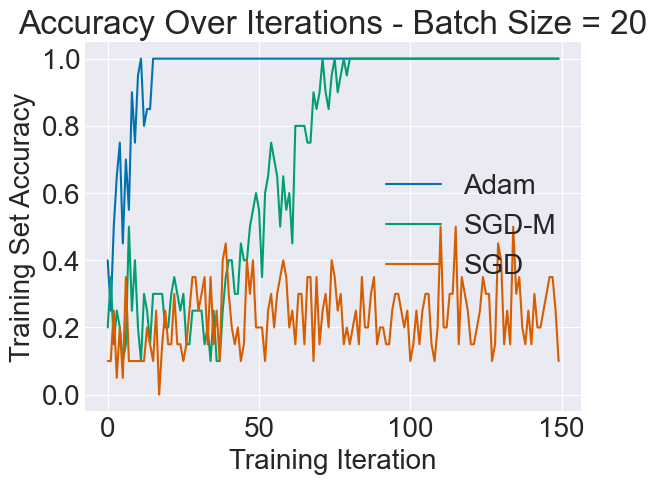

In [ ]:

plt.plot(np.arange(0,150), net1.train_acc_history, label='Adam')
plt.plot(np.arange(0,150), net2.train_acc_history, label='SGD-M')
plt.plot(np.arange(0,150), net3.train_acc_history, label='SGD')

plt.xlabel('Training Iteration')
plt.ylabel('Training Set Accuracy')
plt.title("Accuracy Over Iterations - Batch Size = 20")
plt.legend()
plt.show()

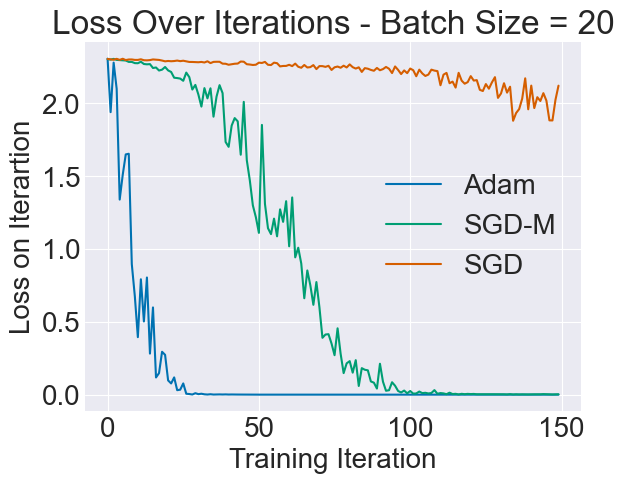

In [ ]:

plt.plot(np.arange(0,150), net1.loss_history, label='Adam')
plt.plot(np.arange(0,150), net2.loss_history, label='SGD-M')
plt.plot(np.arange(0,150), net3.loss_history, label='SGD')

plt.xlabel('Training Iteration')
plt.ylabel('Loss on Iterartion')
plt.title("Loss Over Iterations - Batch Size = 20")
plt.legend()
plt.show()

## Training our convolutional neural network on STL-10

### Load in STL-10 at 32x32 resolution

In [ ]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
# preprocess and create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4398, n_test_samps=400, n_valid_samps=200, n_dev_samps=2, scale_fact=3)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4398, 3, 32, 32)
Train labels shape:  (4398,)
Test data shape:  (400, 3, 32, 32)
Test labels shape:  (400,)
Validation data shape:  (200, 3, 32, 32)
Validation labels shape:  (200,)
dev data shape:  (2, 3, 32, 32)
dev labels shape:  (2,)


### 8b. Set up accelerated convolution and max pooling layers

As you may have noticed, we had to downsize STL-10 to 16x16 resolution to train the network on the dev set (N=20) in a reasonable amount of time. The training set has N≅4000 samples, how will we ever manage to process that amount of data?!

On one hand, this is an unfortunate inevitable reality of working with large ("big") datasets: you can easily find a dataset that is too time consuming to process for any computer, despite how fast/many CPU/GPUs it has.

On the other hand, we can do better for this project and STL-10 :) If you were to time (profile) different parts of the training process, you'd notice that largest bottleneck is convolution and max pooling operations (both forward/backward). You implemented those operations intuitively, which does not always yield the best performance. **By swapping out forward/backward convolution and maxpooling for implementations that use different algorithms (im2col, reshaping) that are compiled to C code, we will speed up training up by several orders of magnitude**.

Follow these steps to subsitute in the "accelerated" convolution and max pooling layers.

- Install the `cython` python package: `pip3 install cython`.
- Dowload files `im2col_cython.pyx`, `accelerated_layer.py`, `setup.py` from the project website. Put them in your base project folder.
- Open terminal, `cd` to Project directory.
- Compile the im2col functions: `python3 setup.py build_ext --inplace`. A `.c` and `.so` file should have appeared in your project folder (*It is ok if it prints out a bunch of warnings. If it creates `.c` and `.so` files after a few seconds, you should be all set.*).
- Restart Jupyter Notebook kernel
- Create a class called `Conv4NetAccel` in `network.py` by copy-pasting the contents of `Conv4Net`. Import `accelerated_layer` at the top and replace the `Conv2D` and `MaxPooling2D` layers with `Conv2DAccel` and `MaxPooling2DAccel`.


#### Windows users

The above compile terminal command for Windows users is:

```bash
python setup.py build_ext --inplace
```

Before this can work though, you’ll need a C/C++ compiler installed on your system. To do this, download [Microsoft Build tools for Visual Studio 2019](https://visualstudio.microsoft.com/thank-you-downloading-visual-studio/?sku=BuildTools&rel=16). Click to download the installer. Run it and select the C++ compiler option. It might ask you to install other stuff, but that shouldn’t be necessary — just the C++ compiler. After it is installed, run the above python terminal command. It should end without error (last line should be “Finished generating code”). Warning printouts are fine.

### 8c. Training convolutional neural network on STL-10

You are now ready to train on the entire training set.

- Create a `Conv4NetAccel` object with hyperparameters of your choice.
- Your goal is to achieve at least 45% accuracy on the test and/or validation set.

#### Notes

- I suggest using your intuition about hyperparameters and over/underfitting to guide your choice, rather than a grid search. This should not be overly challenging.
- Use the best / most efficient optimizer based on your prior analysis.
- It should take on the order of 1 sec per training iteration. If that's way off, seek help as something could be wrong with running the acclerated code.

In [ ]:
from network import ConvNet4Accel

In [ ]:
# Adam
accel_net = ConvNet4Accel(input_shape=(3, 32, 32), wt_scale= 1e-2, verbose=False)
accel_net.compile('Adam')
accel_net.fit(x_train=x_train, y_train=y_train, x_validate=x_val, y_validate=y_val, n_epochs=50, mini_batch_sz=150, print_every=49, acc_freq=10)
print(accel_net.train_acc_history)


Epoch # 0 
Iteration # 0 
Training loss:  2.3022427398437415 
Validation accuracy:  0.135
Time required for one iteration: 1.2743721008300781
Epoch # 1 
Iteration # 49 
Training loss:  1.5591609200700538 
Validation accuracy:  0.335
Epoch # 3 
Iteration # 98 
Training loss:  1.3749828905709316 
Validation accuracy:  0.41
Epoch # 5 
Iteration # 147 
Training loss:  1.2208905487108295 
Validation accuracy:  0.445
Epoch # 6 
Iteration # 196 
Training loss:  1.0884030128876556 
Validation accuracy:  0.465
Epoch # 8 
Iteration # 245 
Training loss:  0.9711528281232643 
Validation accuracy:  0.45
Epoch # 10 
Iteration # 294 
Training loss:  0.788480286817118 
Validation accuracy:  0.475
Epoch # 11 
Iteration # 343 
Training loss:  0.5816236529972374 
Validation accuracy:  0.43
Epoch # 13 
Iteration # 392 
Training loss:  0.40189088164902664 
Validation accuracy:  0.51
Epoch # 15 
Iteration # 441 
Training loss:  0.2662608106801984 
Validation accuracy:  0.5
Epoch # 16 
Iteration # 490 
Train

### 8d. Analysis of STL-10 training quality

Use your trained network that achieves 45%+ accuracy on the test set to make "high quality" plots showing the following

- Plot the accuracy of the training and validation sets as a function of training epoch. You may have to convert iterations to epochs.
- Plot the loss as a function of training iteration.

145


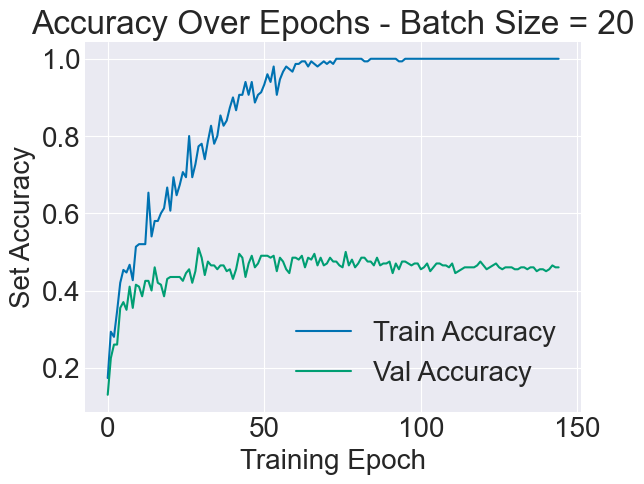

In [ ]:
print(len(accel_net.train_acc_history))
plt.plot(np.arange(0,145), accel_net.train_acc_history, label='Train Accuracy')
plt.plot(np.arange(0,145), accel_net.validation_acc_history, label='Val Accuracy')

plt.xlabel('Training Epoch')
plt.ylabel('Set Accuracy')
plt.title("Accuracy Over Epochs - Batch Size = 20")
plt.legend()
plt.show()

1450


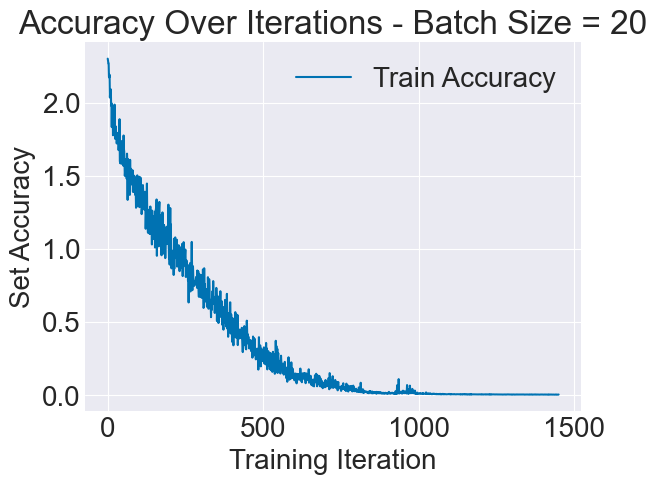

In [ ]:
print(len(accel_net.loss_history))
plt.plot(np.arange(0,1450), accel_net.loss_history, label='Train Accuracy')
plt.xlabel('Training Iteration')
plt.ylabel('Set Accuracy')
plt.title("Loss Over Iterations - Batch Size = 20")
plt.legend()
plt.show()

### 8e. Visualize layer weights

Run the following code and submit the inline image of the weight visualization of the 1st layer (convolutional layer) of the network.

**Note:**
- Setting optional parameter to `True` will let you save a .PNG file in your project folder of your weights. I'd suggest setting it to `False` unless look at your weights and they look like they are worth saving. You don't want a training run that produces undesirable weights to overwrite your good looking results!

In [ ]:
def plot_weights(wts, saveFig=True, filename='convWts.png'):
    grid_sz = int(np.sqrt(len(wts)))
    plt.figure(figsize=(10,10))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    if saveFig:
        plt.savefig(filename)
    plt.show()

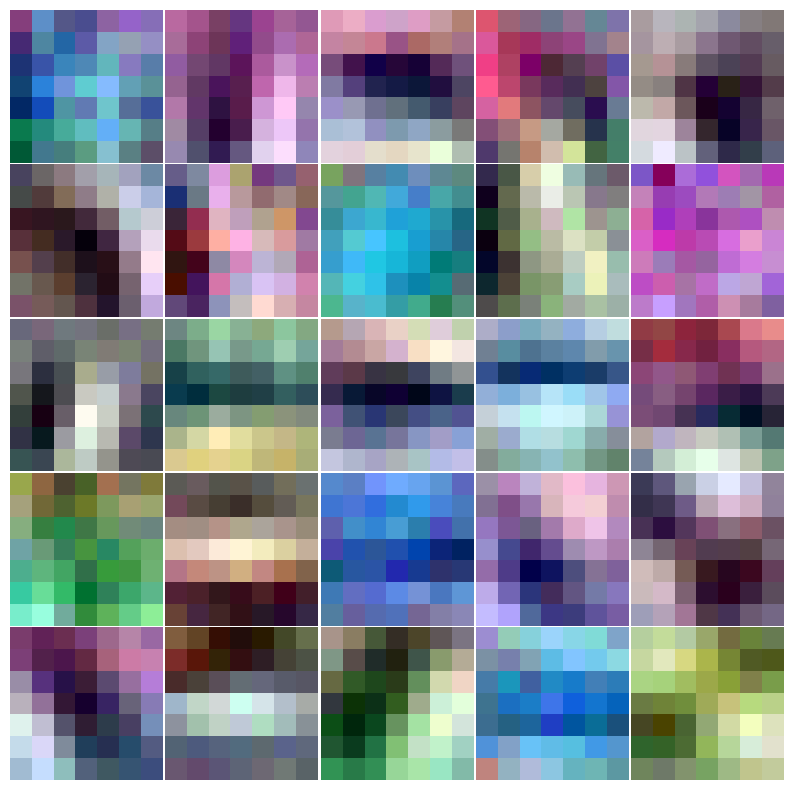

In [ ]:
# Subsitute your trained network below
# netT is my network's name
# Every weight should not look like RGB noise
plot_weights(accel_net.layers[0].wts.transpose(0, 2, 3, 1), saveFig=True, filename='convWts_adam_train_20epoch.png')

### 8f. Questions

**Question 7:** What do the learned filters look like? Does this make sense to you / is this what you expected? In which area of the brain do these filters resemble cell receptive fields?

#### Note

You should not see RGB "noise". If you do, and you pass the "overfit" test with the Adam optimizer, you probably need to increase the number of training epochs.

**Answer 7:**
The learned filters roughly look like representatives from each class. This is a bit different than what we expected, as we assumed the weights would more closely look like the actual pictures, but it does make sense as the images have been scaled down to size 32x32, which is why they look "blocky". These filters resemble cell receptive fields in the primary visual cortex.

## Extensions

**General advice:** When making modifications for extensions, make small changes, then check to make sure you pass test code. Also, test out the network runtime on small examples before/after the changes. If you're not careful, the simulation time can become intractable really quickly!

**Remember:** One thorough extension usually is worth more than several "shallow" extensions.

### 0. Pedal to the metal: achieve high accuracy on STL-10

You can achieve higher (>50%) classification accuracy on the STL-10 test set. Find the hyperparameters to achieve this. You can use random or grid search — keep in mind that even with the accelerated layers, each training run will take at least minutes to complete.

### 1. Experiment with different network architectures.

The design of the `Network` class is modular. As long as you're careful about shapes, adding/removing network layers (e.g. `Conv2D`, `Dense`, etc.) should be straight forward. Experiment with adding another sequence of `Conv2D` and `MaxPooling2D` layers. Add another `Dense` hidden layer before the output layer. How do the changes affect classification accuracy and loss?

### 2. Experiment with different network hyperparameters.

Explore the affect one or more change below has on classification. Be careful about how the hyperparameters may affect the shape of network layers. Thorough analysis will get you more points (not try a few ad hoc values).

- Experiment with different numbers of hidden units in the Dense layers.
- Experiment different max pooling window sizes and strides.
- Experiment with kernel sizes (not 7x7). Can you get away with smaller ones? Do they perform just as well? What is the change in runtime like? What is the impact on their visualized appearance?
- Experiment with number of kernels in the convolutional layer. Is more/fewer better? What is the impact on their visualized appearance?

### 3. Different hidden layer activation functions

Implement and experiment with activation functions that are appropriate for hidden layers (e.g. ELU, SELU, GELU, sigmoid, Softplus, Mish, etc.). How do they affect speed of training and accuracy? These activation functions can replace ReLU in Dense and Conv2D layers.

###  4. Add and test some training bells and whistles

Add features like early stopping, learning rate decay (learning rate at the end of an epoch becomes some fraction of its former value), etc and assess how they affect training loss convergence and accuracy.

### 5. Additional optimizers

Research other optimizers used in backpropogation and implement one or more of them within the model structure. Compare its performance to ones you have implemented

### 6. Optimize your algorithms

Find the main performance bottlenecks in the network and improve your code to reduce runtime (e.g. reduce explicit for loops, increase vectorization, etc). Research faster algorithms to do operations like convolution and implement them. Given the complexity of the network, I suggest focusing on one area at a time and make sure everything you change passes the test code before proceeding. Quantify and discuss your performance improvements

### 7. Additional loss functions

Implement support for sigmoid, or another activation functions and associated losses. Test it out and compare with softmax/cross entropy. Make sure any necessary changes to the layer's gradient are made.

### 8. Additional datasets

Do classification and analyze the results with an image dataset of your choice (MNIST, Fashion MNIST, CIFAR10, etc.).

### 9. Performance analysis

Do a thorough comparative analysis of the non-accelerated network and accelerated networks with respect to runtime.

### 10. Visualize network predictions

Plot predicted class labels with a sample of test images to better assess where the network excels and where it struggles.

### 11. Confusion matrix

Make a confusion matrix and analyze the pattern of errors made by the network. For example, does the network confuse any two classes far more than others?

In [ ]:
print(accel_net.accuracy(x_test, y_test))

0.515


As seen above, it appears that our current model with set hyperparameters (n_epochs=50, mini_batch_sz=150) achieves a test accuracy of 53%.

In [ ]:
labels = ["airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey","ship", "truck"]

<Axes: >

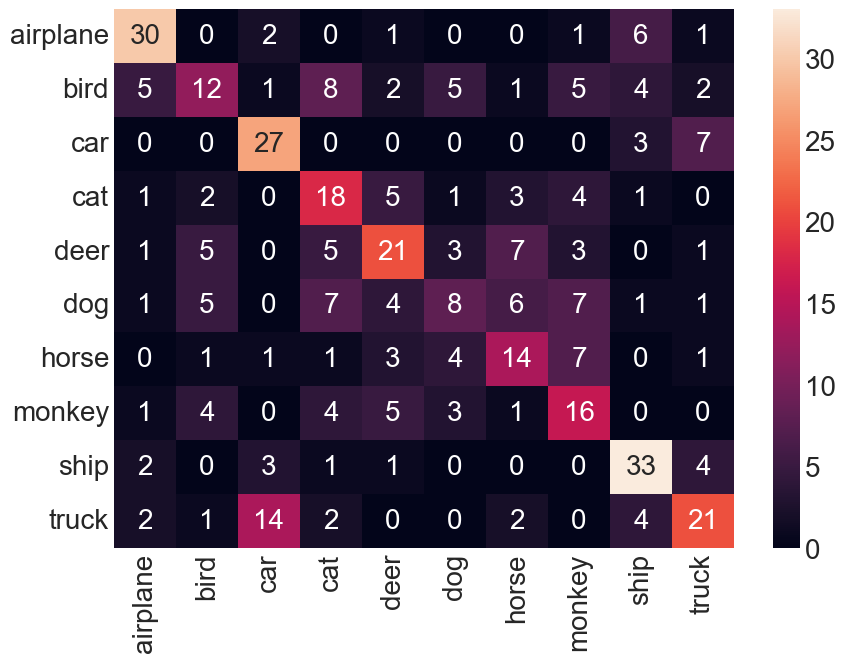

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sb
y_pred = accel_net.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in labels], columns = [i for i in labels])
plt.figure(figsize = (10,7))
sb.heatmap(df_cm, annot=True)

## Extension 8: Aditional Dataset

We train our accelerated net on MNIST dataset and see the training loss as well as training and validation accuracies.

In [ ]:
x_train = np.load('data/mnist_train_data.npy')
y_train = np.load('data/mnist_train_labels.npy')
x_test = np.load('data/mnist_test_data.npy')
y_test = np.load('data/mnist_test_labels.npy')

x_train = x_train/255
x_test = x_test/255

x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]
x_validate = x_train[:2500]
y_validate = y_train[:2500]
x_dev = x_train[2500:2550]
y_dev = y_train[2500:2550]
x_train = x_train[5000:60000]
y_train = y_train[5000:60000]

print(x_train.shape)
print(x_test.shape)
print(x_dev.shape)
print(x_validate.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)
print(y_dev.shape)

(55000, 1, 28, 28)
(10000, 1, 28, 28)
(50, 1, 28, 28)
(2500, 1, 28, 28)
(55000,)
(2500,)
(10000,)
(50,)


In [ ]:
net_mnist = ConvNet4Accel(input_shape=(1, 28, 28), wt_scale= 1e-2, verbose=False)
net_mnist.compile('Adam', lr = 1e-2)
net_mnist.fit(x_train=x_train, y_train=y_train, x_validate=x_validate, y_validate=y_validate, n_epochs=10, mini_batch_sz=1000, print_every=30, acc_freq=10)

Time required for one iteration: 2.665178060531616

Projected time for all iterations: 1465.847933292389
Epoch # 0 
Iteration # 0 
Training loss:  2.303039306656491 
Validation accuracy:  0.118
Epoch # 0 
Iteration # 30 
Training loss:  0.16179092793559843 
Validation accuracy:  0.942
Epoch # 1 
Iteration # 60 
Training loss:  0.05863449428659288 
Validation accuracy:  0.978
Epoch # 1 
Iteration # 90 
Training loss:  0.07296077447929711 
Validation accuracy:  0.974
Epoch # 2 
Iteration # 120 
Training loss:  0.037786542006432444 
Validation accuracy:  0.984
Epoch # 2 
Iteration # 150 
Training loss:  0.03836238935836444 
Validation accuracy:  0.982
Epoch # 3 
Iteration # 180 
Training loss:  0.0274536606164444 
Validation accuracy:  0.986
Epoch # 3 
Iteration # 210 
Training loss:  0.02890733365512757 
Validation accuracy:  0.98
Epoch # 4 
Iteration # 240 
Training loss:  0.013153010833697574 
Validation accuracy:  0.982
Epoch # 4 
Iteration # 270 
Training loss:  0.011214690910651382 

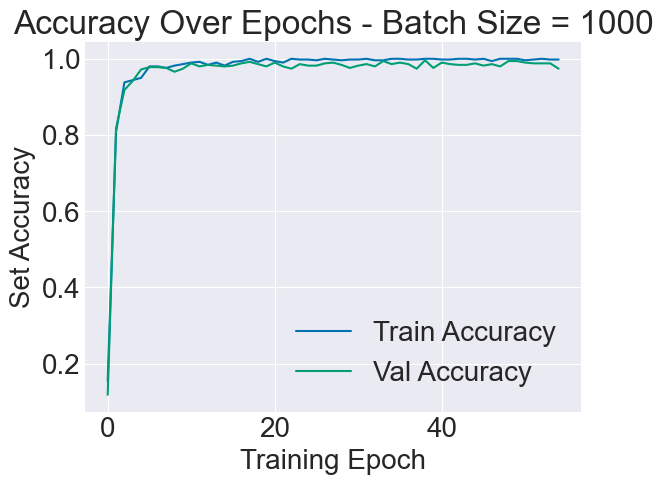

In [ ]:
plt.plot(np.arange(0,len(net_mnist.train_acc_history)), net_mnist.train_acc_history, label='Train Accuracy')
plt.plot(np.arange(0,len(net_mnist.validation_acc_history)), net_mnist.validation_acc_history, label='Val Accuracy')

plt.xlabel('Training Epoch')
plt.ylabel('Set Accuracy')
plt.title("Accuracy Over Epochs - Batch Size = 1000")
plt.legend()
plt.show()

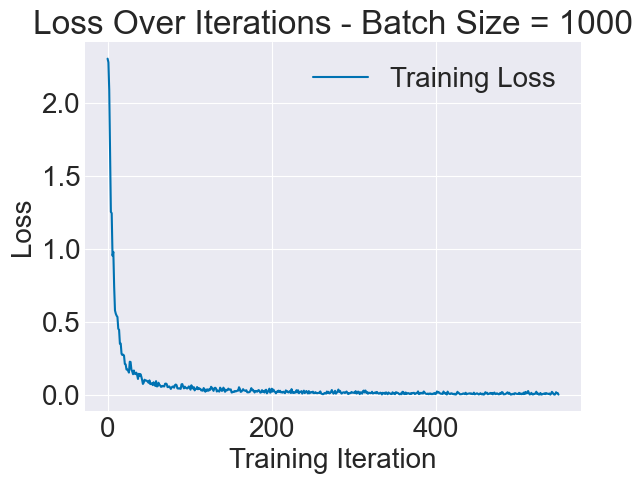

In [ ]:
plt.plot(np.arange(0,len(net_mnist.loss_history)), net_mnist.loss_history, label='Training Loss')
plt.xlabel('Training Iteration')
plt.ylabel('Loss')
plt.title("Loss Over Iterations - Batch Size = 1000")
plt.legend()
plt.show()

Here, as we can say, with the increase of number of iterations, the training loss goes down and almost touches zero. We also see that the training accuracies and validation accuracies are also very high. We have an important observation here. We obtained an accuracy of around 0.5 in the STL-10 dataset. However, we are getting a validation accuracy of nearly 1 in the MNIST dataset. It's because the MNIST dataset just contains the 10 digits, and after training our network on a big pool of data, it can learn the patterns of the digits very well even without much hyperparameter training. However, the STL-10 dataset is formed of different images and as we can understand, learning patterns in images and identifying those correctly is way harder than learning patterns in the digits. So, our results meet our expectation.

## Extension 2: Different network hyperparameters



`Varying Kernel size (We abort after 1 iteration)`

In [ ]:
load_stl10_dataset.purge_cached_dataset()
# preprocess and create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4398, n_test_samps=400, n_valid_samps=200, n_dev_samps=2, scale_fact=3)

# print ('Train data shape: ', x_train.shape)
# print ('Train labels shape: ', y_train.shape)
# print ('Test data shape: ', x_test.shape)
# print ('Test labels shape: ', y_test.shape)
# print ('Validation data shape: ', x_val.shape)
# print ('Validation labels shape: ', y_val.shape)
# print ('dev data shape: ', x_dev.shape)
# print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!


In [ ]:
# less than the default


accelerated_net = ConvNet4Accel(input_shape=(3, 32, 32),ker_sz=(4, ), wt_scale= 1e-2, verbose=False)
accelerated_net.compile('Adam')
accelerated_net.fit(x_train=x_train, y_train=y_train, x_validate=x_val, y_validate=y_val, n_epochs=50, mini_batch_sz=150, print_every=50, acc_freq=10, abort_after_one=True)


Time required for one iteration: 0.4622993469238281

Projected time for all iterations: 670.3340530395508
Epoch # 0 
Iteration # 0 
Training loss:  2.303399324108297 
Validation accuracy:  0.16


In [ ]:
# The default


accelerated_net = ConvNet4Accel(input_shape=(3, 32, 32), wt_scale= 1e-2, verbose=False)
accelerated_net.compile('Adam')
accelerated_net.fit(x_train=x_train, y_train=y_train, x_validate=x_val, y_validate=y_val, n_epochs=50, mini_batch_sz=150, print_every=50, acc_freq=10, abort_after_one=True)


Time required for one iteration: 0.6552226543426514

Projected time for all iterations: 950.0728487968445
Epoch # 0 
Iteration # 0 
Training loss:  2.3013863474695597 
Validation accuracy:  0.155


In [ ]:
# more than the default

accelerated_net = ConvNet4Accel(input_shape=(3, 32, 32),ker_sz=(12, ), wt_scale= 1e-2, verbose=False)
accelerated_net.compile('Adam')
accelerated_net.fit(x_train=x_train, y_train=y_train, x_validate=x_val, y_validate=y_val, n_epochs=50, mini_batch_sz=150, print_every=50, acc_freq=10, abort_after_one=True)


Time required for one iteration: 1.207930326461792

Projected time for all iterations: 1751.4989733695984
Epoch # 0 
Iteration # 0 
Training loss:  2.303419816290879 
Validation accuracy:  0.165


As we can see, with the increase of the size of the kernel, the training time increases. It is understandable as when we increase kernel size, we are considering a bigger region, which leads to a bigger calculation and that's why, our runtime is more. Though the network becomes more complex with the increase of kernel size, it doesn't necessarily ensure a better performance.

`Varying number of kernels`

In [ ]:
# Less than default


accelerated_net = ConvNet4Accel(input_shape=(3, 32, 32), n_kers=(16, ), wt_scale= 1e-2, verbose=False)
accelerated_net.compile('Adam')
accelerated_net.fit(x_train=x_train, y_train=y_train, x_validate=x_val, y_validate=y_val, n_epochs=50, mini_batch_sz=150, print_every=50, acc_freq=10, abort_after_one=False)


Time required for one iteration: 0.4252278804779053

Projected time for all iterations: 616.5804266929626
Epoch # 0 
Iteration # 0 
Training loss:  2.303039855032335 
Validation accuracy:  0.125
Epoch # 1 
Iteration # 50 
Training loss:  1.5890083101699808 
Validation accuracy:  0.315
Epoch # 3 
Iteration # 100 
Training loss:  1.3563063740205523 
Validation accuracy:  0.37
Epoch # 5 
Iteration # 150 
Training loss:  1.3592750182367759 
Validation accuracy:  0.44
Epoch # 6 
Iteration # 200 
Training loss:  1.2151812855502702 
Validation accuracy:  0.435
Epoch # 8 
Iteration # 250 
Training loss:  1.0148793116698738 
Validation accuracy:  0.48
Epoch # 10 
Iteration # 300 
Training loss:  0.9653836943385379 
Validation accuracy:  0.425
Epoch # 12 
Iteration # 350 
Training loss:  0.8506300977016424 
Validation accuracy:  0.46
Epoch # 13 
Iteration # 400 
Training loss:  0.6180691381855629 
Validation accuracy:  0.425
Epoch # 15 
Iteration # 450 
Training loss:  0.5395868458960871 
Valida

In [ ]:
# The default

accelerated_net = ConvNet4Accel(input_shape=(3, 32, 32), wt_scale= 1e-2, verbose=False)
accelerated_net.compile('Adam')
accelerated_net.fit(x_train=x_train, y_train=y_train, x_validate=x_val, y_validate=y_val, n_epochs=50, mini_batch_sz=150, print_every=50, acc_freq=10, abort_after_one=True)


Time required for one iteration: 0.6915066242218018

Projected time for all iterations: 1002.6846051216125
Epoch # 0 
Iteration # 0 
Training loss:  2.3027092218075587 
Validation accuracy:  0.165


In [ ]:
# Less than default


accelerated_net = ConvNet4Accel(input_shape=(3, 32, 32), n_kers=(48, ), wt_scale= 1e-2, verbose=False)
accelerated_net.compile('Adam')
accelerated_net.fit(x_train=x_train, y_train=y_train, x_validate=x_val, y_validate=y_val, n_epochs=50, mini_batch_sz=150, print_every=50, acc_freq=10, abort_after_one=True)


Time required for one iteration: 0.8476755619049072

Projected time for all iterations: 1229.1295647621155
Epoch # 0 
Iteration # 0 
Training loss:  2.3015545786590264 
Validation accuracy:  0.08


Here, we see that as we increase the number of kernels, the runtime increases. It's because with the increase of kernels, we are looping more, which leads to the increase in runtime. However, we don't notice a significant change in the performance with the increase/decrease of number of kernels. Our validation accuracy remains in the range of 0.5 for the STL-10 dataset. So, we can't conclude that an increase/decrease in the number of kernels will necessarily give us a better accuracy. We need to find that specific kernel size that gives us the best result.

## Extension 9:

Performance Analysis

In [ ]:
# Normal net
net_n = ConvNet4(input_shape=(3, 32, 32), wt_scale= 1e-2, verbose=False)
net_n.compile('Adam')
net_n.fit(x_train=x_train, y_train=y_train, x_validate=x_val, y_validate=y_val, n_epochs=50, mini_batch_sz=150, print_every=49, acc_freq=10, abort_after_one=True)



Time required for one iteration: 100.81749033927917

Projected time for all iterations: 146185.3609919548
Epoch # 0 
Iteration # 0 
Training loss:  2.303677744866173 
Validation accuracy:  0.1


In [ ]:
# Accelerated Net

accelerated_net = ConvNet4Accel(input_shape=(3, 32, 32), wt_scale= 1e-2, verbose=False)
accelerated_net.compile('Adam')
accelerated_net.fit(x_train=x_train, y_train=y_train, x_validate=x_val, y_validate=y_val, n_epochs=50, mini_batch_sz=150, print_every=49, acc_freq=10, abort_after_one=True)



Time required for one iteration: 0.7217884063720703

Projected time for all iterations: 1046.593189239502
Epoch # 0 
Iteration # 0 
Training loss:  2.3017507180731718 
Validation accuracy:  0.155


Here, as we can see, we have two different networks, one is the normal one and one is the accelerated one. We run the two networks for the first iteration only and then abort as running them for the whole training will take a long time. Moreover, we find the projected time to run all the iterations. We also have a variable that can keep track of the total training time.

The training time for one iteration in our normal net is 100.82 second (app.) and for our accelerated net, the training time for one iteration is 0.722 second (app.)

So, our accelerated net is 100.82/0.722 = 139.64 or about 140 times faster than the normal one.